##Multi Layer Perceptron 템플릿 따라 만들어보기

In [4]:
import numpy as np
import torch
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms #Prepare dataset
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print(f"Pytorch version:{torch.__version__}")

#Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f"this notebook use {device}")

Pytorch version:1.7.0+cu101
this notebook use cuda:0


#Set hyper-parameter

In [5]:
EPOCHS = 10
BATCH_SIZE = 256
LEARNING_RATE = 0.001

#Prepare dataset and iterator

In [6]:
#Dataset
mnist_train = datasets.MNIST(root='./data/', train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root='./data/', train=False, transform=transforms.ToTensor(), download=True)
#Data Iterator
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=BATCH_SIZE, shuffle=True, num_workers=1)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=BATCH_SIZE, shuffle=True, num_workers=1)

print("Preparing dataset is done!")

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!
Preparing dataset is done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


#Defining Model Class

In [7]:
class Model(nn.Module):
    def __init__(self, input_feature=784, hidden_size=256, output_feature=10, init_weight="he", init_bias="zero"):
        super(Model, self).__init__()
        self.init_weight = init_weight
        self.init_bias = init_bias

        self.linear1 = nn.Linear(input_feature, hidden_size)
        self.linear2 = nn.Linear(hidden_size, output_feature)
        self.init_params()

    def init_params(self):
        init_weight_method = {"he": nn.init.kaiming_normal_,
                              "xavier": nn.init.xavier_normal_}
        #assert 조건, 메시지
        assert self.init_weight in init_weight_method.keys(), f'select the wiehgt init method in {list(init_weight_method.keys())}'

        init_bias_method = {"zero": nn.init.zeros_,
                            "uniform": nn.init.uniform_}
        assert self.init_bias in init_bias_method.keys(), f'select the bias init method in {list(init_bias_method.keys())}'

        for param_name, param in self.named_parameters():
            if 'weight' in param_name:
                print(param)
                init_weight_method[self.init_weight](param)
            elif 'bias' in param_name:
                init_bias_method[self.init_bias](param)

    def forward(self, X):
        X = F.relu((self.linear1(X)))
        X = self.linear2(X)
        return X

#모델 선언

In [8]:
model = Model().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

Parameter containing:
tensor([[ 2.5223e-02, -2.3039e-02, -2.7745e-02,  ...,  2.6612e-02,
         -6.1541e-04,  2.0905e-03],
        [-2.1724e-02,  2.5024e-02,  3.5298e-02,  ..., -1.6353e-02,
          1.3586e-02, -2.3194e-02],
        [ 1.7029e-02,  1.4813e-02,  1.0040e-02,  ..., -9.1256e-03,
          1.7686e-02, -1.1467e-02],
        ...,
        [-8.8341e-03, -3.4964e-02,  3.1410e-02,  ...,  3.0451e-02,
          3.5352e-02,  2.7005e-02],
        [ 2.5072e-02, -3.2211e-02, -1.6249e-03,  ..., -2.5941e-05,
          3.4181e-02,  3.4719e-02],
        [ 1.3967e-02, -4.2923e-04,  2.3542e-02,  ...,  1.5422e-02,
         -2.6723e-02,  1.6369e-04]], requires_grad=True)
Parameter containing:
tensor([[-2.0614e-02, -5.9204e-02, -1.4571e-02,  ..., -1.3518e-02,
          8.5592e-03, -2.1103e-04],
        [-3.9643e-02,  4.7241e-02, -2.7464e-02,  ..., -4.8186e-02,
          3.0502e-02, -5.9885e-03],
        [-3.5019e-02, -2.0218e-02,  6.2101e-02,  ..., -2.2998e-02,
          8.0409e-03, -1.3935e-

##선언된 모델 파라미터 살펴보기

In [12]:
for param_name, param in model.named_parameters():
    print(param_name)
    print(param)

linear1.weight
Parameter containing:
tensor([[ 0.1367,  0.0122,  0.0144,  ..., -0.0401,  0.0106,  0.0092],
        [-0.0688, -0.0576,  0.0807,  ..., -0.0003,  0.0194, -0.0426],
        [-0.0484, -0.0077,  0.1097,  ..., -0.0265,  0.0277, -0.0347],
        ...,
        [-0.0929,  0.0213,  0.0343,  ..., -0.0170, -0.0635,  0.0601],
        [-0.0210, -0.0100, -0.0215,  ..., -0.0150, -0.0155,  0.0093],
        [-0.0442, -0.0223, -0.0071,  ...,  0.0523, -0.0023, -0.0164]],
       device='cuda:0', requires_grad=True)
linear1.bias
Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.

In [13]:
total_params = 0
for param_name, param in model.named_parameters():
    if param.requires_grad:
        total_params += len(param.reshape(-1))

print(f"Number of Total Parameters: {total_params:,d}")

Number of Total Parameters: 203,530


#모델에 임의 값 넣어서 테스트 해보기

In [47]:
value = torch.Tensor(1,1,28, 28).to(device)
value = value.reshape(-1)
value.shape

test_predicted = model(value)
print(test_predicted.shape)
print(test_predicted)

torch.Size([10])
tensor([-6.4503e+28, -2.0065e+29, -1.8130e+29, -1.1945e+29, -1.8944e+29,
        -6.6300e+28,  2.2800e+29, -6.9784e+29,  5.1482e+29, -2.8023e+29],
       device='cuda:0', grad_fn=<AddBackward0>)


In [48]:
_, max = torch.max(test_predicted.data, 0)
print(_, max)

tensor(5.1482e+29, device='cuda:0') tensor(8, device='cuda:0')


# help function 정의

In [53]:
def test_eval(model, data_iter, batch_size):
    with torch.no_grad():
        test_loss = 0
        total = 0
        correct = 0
        for batch_img, batch_lab in data_iter: #batch_img는 28*28 이미지를 표현한 텐서들, batch_lab은 정답 레이블 텐서
            X = batch_img.view(-1, 28*28).to(device)
            Y = batch_lab.to(device)
            y_pred = model(X)
            _, predicted = torch.max(y_pred.data, 1)
            correct += (predicted == Y).sum().item()
            total += batch_img.size(0)
        val_acc = (100 * correct / total)
    return val_acc

#Train MLP Model

In [54]:
# Training Phase
print_every = 1
print("Start training !")
# Training loop
for epoch in range(EPOCHS):
    loss_val_sum = 0
    for batch_img, batch_lab in train_iter:

        X = batch_img.view(-1, 28*28).to(device)
        Y = batch_lab.to(device)
        
        # Inference & Calculate los
        y_pred = model.forward(X)
        loss = criterion(y_pred, Y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        loss_val_sum += loss
        
    if ((epoch%print_every)==0) or (epoch==(EPOCHS-1)):
        # accr_val = M.test(x_test, y_test, batch_size)
        loss_val_avg = loss_val_sum / len(train_iter)
        accr_val = test_eval(model, test_iter, BATCH_SIZE)
        print(f"epoch:[{epoch+1}/{EPOCHS}] cost:[{loss_val_avg:.3f}] test_accuracy:[{accr_val:.3f}]")
print("Training Done !")

Start training !
epoch:[1/10] cost:[0.115] test_accuracy:[96.830]
epoch:[2/10] cost:[0.089] test_accuracy:[97.260]
epoch:[3/10] cost:[0.070] test_accuracy:[97.420]
epoch:[4/10] cost:[0.058] test_accuracy:[97.480]
epoch:[5/10] cost:[0.048] test_accuracy:[97.720]
epoch:[6/10] cost:[0.040] test_accuracy:[97.670]
epoch:[7/10] cost:[0.034] test_accuracy:[97.820]
epoch:[8/10] cost:[0.028] test_accuracy:[97.840]
epoch:[9/10] cost:[0.024] test_accuracy:[97.830]
epoch:[10/10] cost:[0.020] test_accuracy:[97.920]
Training Done !


#Test MLP Model

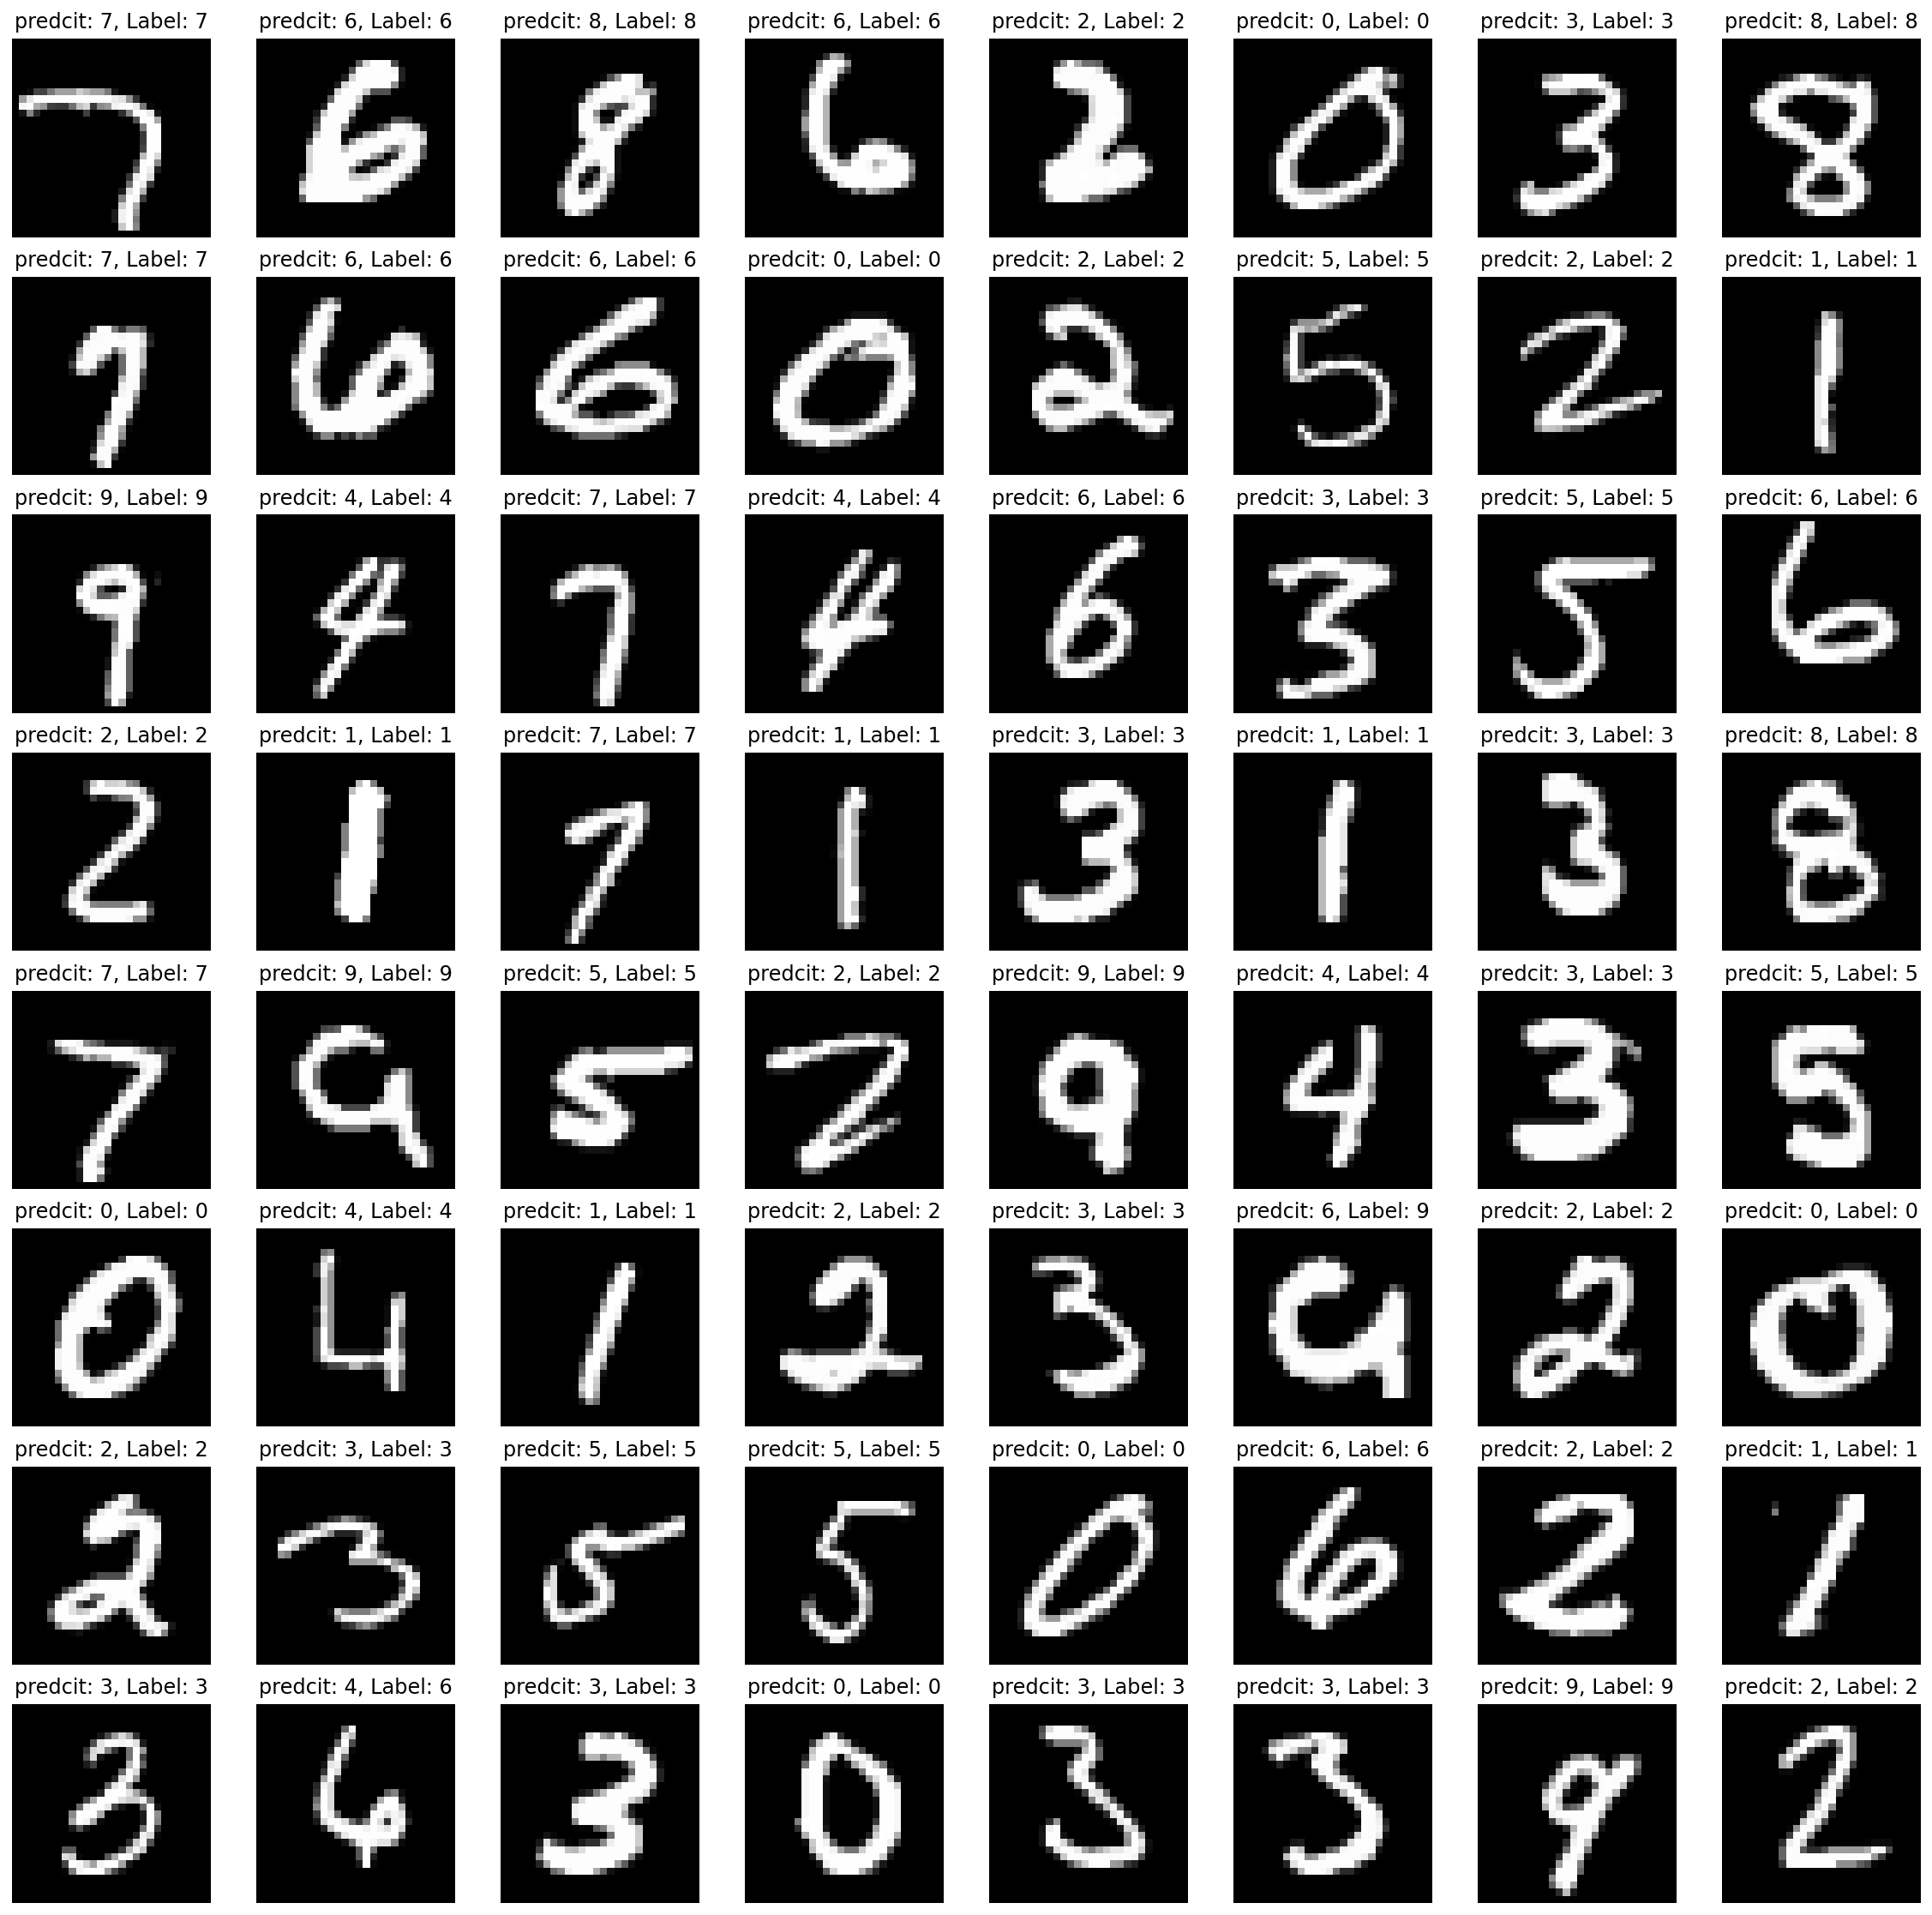

In [55]:
n_sample = 64
sample_indices = np.random.choice(len(mnist_test.targets), n_sample, replace=False)
test_x = mnist_test.data[sample_indices]
test_y = mnist_test.targets[sample_indices]

with torch.no_grad():
    y_pred = model.forward(test_x.view(-1, 28*28).type(torch.float).to(device))

y_pred = y_pred.argmax(axis=1)

plt.figure(figsize=(20,20))

for idx in range(n_sample):
    plt.subplot(8, 8, idx+1)
    plt.imshow(test_x[idx], cmap='gray')
    plt.axis('off')
    plt.title(f"predcit: {y_pred[idx]}, Label: {test_y[idx]}")

plt.show()